In [1]:
%matplotlib inline
from kbmodpy import kbmod as kb
import numpy as np
import matplotlib.pyplot as plt

In [26]:
p = kb.psf(1.5)
imcount = 160
noise = 10
imlist =  []
for i in range(imcount):
    imlist.append(kb.layered_image(
        "t"+str(i), 600, 600, noise, noise*noise, i/imcount))

In [27]:
for im in imlist:
    im.add_object(100+im.get_time()*50, 100+im.get_time()*35, 100.0, p)

In [28]:
stack = kb.image_stack(imlist)

In [29]:
search = kb.stack_search(stack, p)
search.set_debug(True)

In [30]:
#search.gpu( 80, 80, 0.2, 1.0, 50, 75, 10 )

In [31]:
search.region_search(55, 30, 15, 20.0, 10)

[ix: 100.000000 iy: 100.000000 fx: 150.000000 fy: 135.000000 depth: 0 obs_count: 160 lh: 22.114885 flux 94.755577]

In [24]:
#search.get_results(0, 10)

[lh: 24.331686 flux: 147.437271 x: 99 y: 99 x_v: 50.358730 y_v: 35.951550 obs_count: 80,
 lh: 24.259724 flux: 147.001205 x: 99 y: 99 x_v: 50.104393 y_v: 35.769978 obs_count: 80,
 lh: 24.175930 flux: 146.493469 x: 99 y: 99 x_v: 50.867405 y_v: 36.314697 obs_count: 80,
 lh: 24.167555 flux: 146.442719 x: 99 y: 100 x_v: 50.375778 y_v: 33.729385 obs_count: 80,
 lh: 24.135246 flux: 146.246948 x: 99 y: 99 x_v: 49.996704 y_v: 36.453331 obs_count: 80,
 lh: 24.127941 flux: 146.202682 x: 99 y: 100 x_v: 50.635448 y_v: 33.903248 obs_count: 80,
 lh: 24.102066 flux: 146.045898 x: 100 y: 99 x_v: 49.239178 y_v: 35.901009 obs_count: 80,
 lh: 23.999315 flux: 145.423264 x: 100 y: 99 x_v: 48.986668 y_v: 35.716900 obs_count: 80,
 lh: 23.992029 flux: 145.379120 x: 99 y: 100 x_v: 50.551807 y_v: 34.584351 obs_count: 80,
 lh: 23.973503 flux: 145.266876 x: 99 y: 100 x_v: 50.895119 y_v: 34.077110 obs_count: 80]

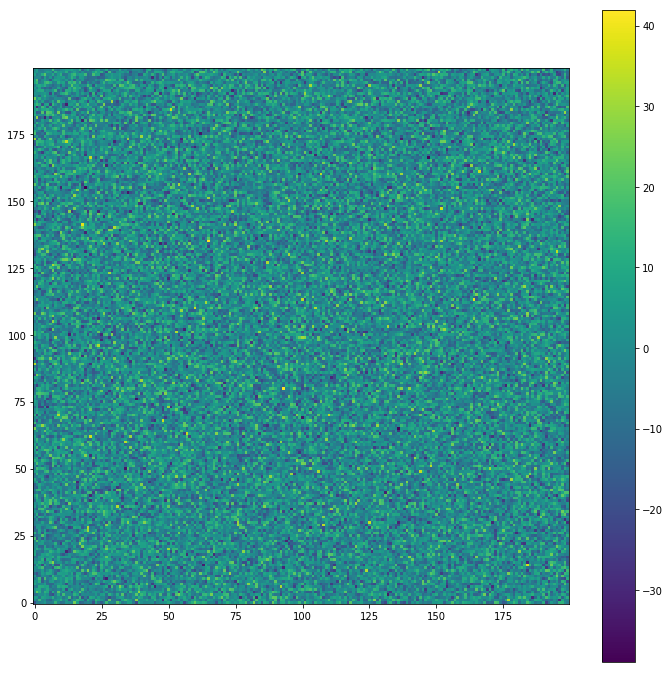

In [9]:
plt.figure(figsize=[12,12])
#imlist[0].convolve(p)
plt.imshow(imlist[0].science())
plt.gca().invert_yaxis()
plt.colorbar()